# Classification Task dengan Decision Tree

Referensi: [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Konsep Dasar

### Terminology: root node, internal node, leaf node

<div>
<img src="./images/decision_tree_example.png" width="600">
</div>

## Gini Impurity

<div>
    <img src="./images/gini_example.png" width="400">
</div>

#### Ruas Kiri:

$G = 1 - \sum_i^n P_i^2$ <p/>
$G = 1 - (\frac{4}{4})^2 = 0$


#### Ruas Kanan:

$G = 1 - \sum_i^n P_i^2$ <p/>
$G = 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.2778$


#### Total Gini Impurity:

$G = \frac{4}{4+6} \times 0 + \frac{6}{4+6} \times  0.2778 = 0.16668$

## Dataset

Referensi: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

X.shape

(150, 4)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan `DecisionTreeClassifier`

In [9]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [8]:
DecisionTreeClassifier?

## Visualisasi Model

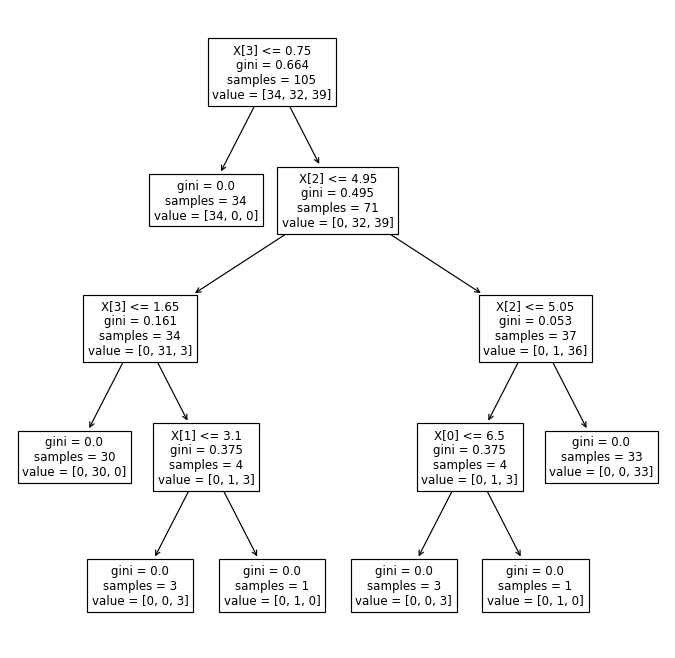

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

In [5]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

